# Machine Learning Exercise 2, Part 2

This notebook covers regularlized logistic regression and gradient descent.

In [1]:
import numpy
import math
from matplotlib import pyplot as plt
from scipy.special import expit as sigmoid
%matplotlib inline

As usual, need to read in the data from the files:

In [2]:
from numpy import genfromtxt
def load(f):
    '''Parse the data from the input file and store in pandas dataframs'''
    # Verify the file exist:
    try:
        _file = open(f, "r")
    except:
        print "ERROR: requested file {} does not exist or could not be opened."

    # For this exercise, both files are csv format:
    data = numpy.genfromtxt(f,delimiter=',')
    return data.T

Load the data from the file:

In [3]:
x1,x2,y = load("ex2/ex2data2.txt")

We want to make a scatter plot of the data, but the marker used needs to be based on the value of y.  Here's a way to do that:

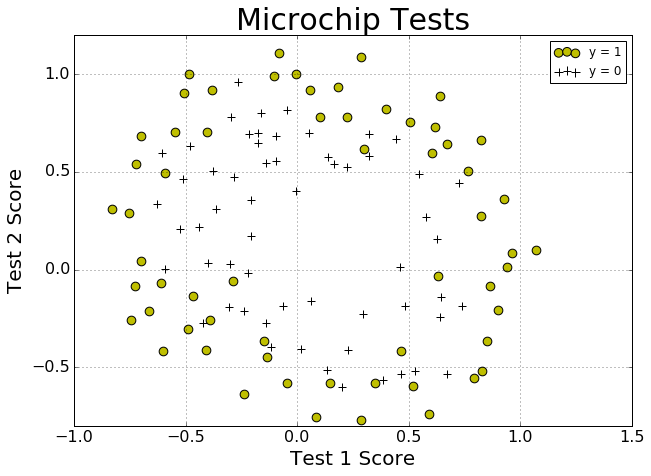

In [4]:

# Set up the plots
fig, ax = plt.subplots(figsize=(10, 7))

# Go through the data and separate all of the types of answers:
unique_vals = set(y)

# Since I know there are two values, I can define the markers by hand:
markers = ["o","+"]
colors = ['y','black']
labels =['y = 1', 'y = 0']

# Here's the cool part: numpy can distribute the comparison operator to the whole array:
i = 0
for val in unique_vals:
    mask = (y == val )
    

    # Make a scatter plot
    ax.scatter(
        x1[mask], x2[mask], c=colors[i], marker=markers[i],label=labels[i],s=75)

    i += 1
    
# Plots require a title and axis labels:
plt.title("Microchip Tests", fontsize=30)
plt.xlabel("Test 1 Score", fontsize=20)
plt.ylabel("Test 2 Score", fontsize=20)

# Make the ticks bigger to be more visible:
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)

# Let's set the axis ranges a little more realistically:
ax.set_xlim([-1, 1.5])
ax.set_ylim([-0.8, 1.2])

# Need a legend, of course:
plt.legend()

plt.grid(True)

We need to map the features onto a bigger set of combinations of x1 and x2:

In [5]:
def mapFeatures(x1,x2):
    # This function maps the two input variables into a longer feature map
    # It has every combination, up to the Nth power (here, set to 6, but generalizeable)
    N = 6
    n_elements = (N+1)*(N+2)/2
    count = 0
    output = numpy.zeros(n_elements)
    for i in xrange(0,N+1):
        for j in xrange(0,N+1 - i):
            output[count] = x1**i * x2**(j)
#             print "{} ({},{}): {}".format(count, i, (j), output[count])
            count += 1
    return output



In [6]:
mapFeatures(x1[0],x2[0])

array([  1.00000000e+00,   6.99560000e-01,   4.89384194e-01,
         3.42353606e-01,   2.39496889e-01,   1.67542444e-01,
         1.17205992e-01,   5.12670000e-02,   3.58643425e-02,
         2.50892595e-02,   1.75514423e-02,   1.22782870e-02,
         8.58939846e-03,   2.62830529e-03,   1.83865725e-03,
         1.28625106e-03,   8.99809795e-04,   6.29470940e-04,
         1.34745327e-04,   9.42624411e-05,   6.59422333e-05,
         4.61305487e-05,   6.90798869e-06,   4.83255257e-06,
         3.38066048e-06,   3.54151856e-07,   2.47750473e-07,
         1.81563032e-08])

Define the cost function:

In [7]:
def h(_theta, _x):
    return sigmoid(numpy.dot(_theta,_x))

def cost(_theta, _x, _y, _l):
    val = (1.0/len(_y)) * (-numpy.dot(y.T, numpy.log(h(_theta,_x))) 
                        - numpy.dot((1-y).T, numpy.log(1 - h(_theta,_x)))
                        + (_l / 2)* numpy.dot(_theta,_theta) )
    return val.flatten()


Define the vector x to use in the functions:

In [8]:
temp = mapFeatures(x1[0],x2[0])
x = numpy.ndarray((len(x1),len(temp)))
for i, _x1, _x2 in zip(xrange(len(x1)), x1, x2):
    x[i] = mapFeatures(_x1,_x2)
x = x.T
print x.shape


(28, 118)


In [9]:
theta = numpy.zeros(x.shape[0])
h(theta,x)

array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5])

That looks good so far.

Also, let's check the cost function works properly:

In [10]:
print cost(theta,x,y,0)

[ 0.69314718]


We also need a function to compute the gradient at each step:

In [11]:
def gradient(_theta,_x,_y,_l):
    grad = (1.0/len(_y)) * numpy.dot((h(_theta,_x) - y),_x.T) + (_l/len(_y)*_theta)
    # This is lazy, but I use the vectorized version and fix the first element:
    grad[0] = (1.0/len(_y)) * numpy.dot((h(_theta,_x) - y),_x.T)[0]
    return grad


In [12]:
print "Initial gradient: ", gradient(theta,x,y,1)

Initial gradient:  [  8.47457627e-03   7.77711864e-05   3.76648474e-02   2.34764889e-02
   3.93028171e-02   3.10079849e-02   3.87936363e-02   1.87880932e-02
   1.15013308e-02   8.19244468e-03   3.09593720e-03   4.47629067e-03
   1.37646175e-03   5.03446395e-02   7.32393391e-03   1.28600503e-02
   5.83822078e-03   7.26504316e-03   1.83559872e-02   2.23923907e-03
   3.38643902e-03   4.08503006e-04   3.93486234e-02   4.32983232e-03
   6.31570797e-03   1.99707467e-02   1.09740238e-03   3.10312442e-02]


The scipy optimize methods have difficulty converging with gradient descent using regularization.  So I will just implement the gradient descent myself:

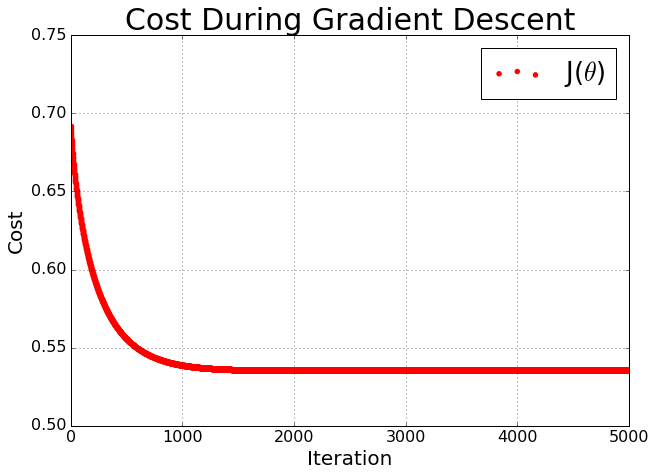

In [13]:
iterations = 5000
alpha = 0.1
l = 1.0

# start_cost = cost()

opt_theta = numpy.zeros(x.shape[0])
opt_cost_history = []

for i in xrange(iterations):
    # Update the theta parameters:
    grad = gradient(opt_theta,x,y,l)
    opt_theta -= alpha*grad
    opt_cost_history.append(cost(opt_theta,x,y,l))

    
opt_cost_history = numpy.asarray(opt_cost_history).flatten()
    
def plotCost(x,y):
    
    #Define the plot
    fig, ax = plt.subplots(figsize=(10,7))
    
    #Plot the data
    # Notice that I have to use a raw string (with the r in front) to render the theta correctly
    plt.scatter(x,y,marker="o",color='r',label=r"J($\theta$)")
    

    # Plots require a title and axis labels:
    plt.title("Cost During Gradient Descent", fontsize=30)
    plt.xlabel("Iteration", fontsize=20)
    plt.ylabel("Cost", fontsize=20)

    # Make the ticks bigger to be more visible:
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    
    # Set the plot limits
    ax.set_xlim(0,iterations)

    # Always, plt.grid(True)
    plt.grid(True)
    plt.legend(fontsize=26)
    
it = range(iterations)
plotCost(it,opt_cost_history)

In [14]:
print "Cost at optimized values is {}".format(cost(opt_theta,x,y,1.0))

Cost at optimized values is [ 0.53584529]


In [15]:
def predict(x1,x2):
    return h(opt_theta,mapFeatures(x1,x2))

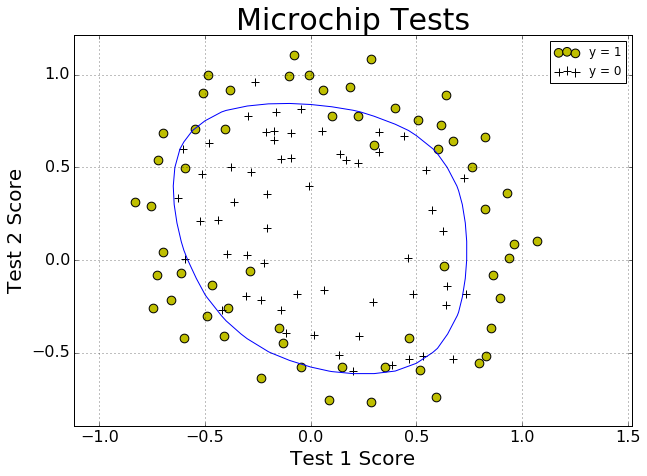

In [16]:

# Set up the plots
fig, ax = plt.subplots(figsize=(10, 7))

# Go through the data and separate all of the types of answers:
unique_vals = set(y)

# Since I know there are two values, I can define the markers by hand:
markers = ["o","+"]
colors = ['y','black']
labels =['y = 1', 'y = 0']

# Here's the cool part: numpy can distribute the comparison operator to the whole array:
i = 0
for val in unique_vals:
    mask = (y == val )
    

    # Make a scatter plot
    ax.scatter(
        x1[mask], x2[mask], c=colors[i], marker=markers[i],label=labels[i],s=75)

    i += 1
    
# The way to make a decision boundary plot work well is to draw it as a contour plot.
# Create a list of exam values to sample over
exam0_vals = numpy.arange(-1,1.5,0.1)
exam1_vals = numpy.arange(-0.8,1.2,0.1)
j_vals = numpy.zeros((len(exam1_vals),len(exam0_vals)))

for i in xrange(len(exam0_vals)):
    for j in xrange(len(exam1_vals)):
        j_vals[j][i] = predict(exam0_vals[i],exam1_vals[j])

# print j_vals
        
# Make the contour plot of the cost function:
contours = plt.contour(exam0_vals,exam1_vals,j_vals,
                       levels=[0.5],
                       colors=['b'],
                       label="Cost Function")
# plt.clabel(contours, inline=1, fmt='%1.1f',fontsize=10)
        
# The method used above is slower, but also generalized for complicated contours
        
# Plots require a title and axis labels:
plt.title("Microchip Tests", fontsize=30)
plt.xlabel("Test 1 Score", fontsize=20)
plt.ylabel("Test 2 Score", fontsize=20)

# Make the ticks bigger to be more visible:
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)

# Let's set the axis ranges a little more realistically:
# ax.set_xlim([30, 100])
# ax.set_ylim([30, 100])

# Need a legend, of course:
plt.legend()

plt.grid(True)

Looks decent enough.

Try again with no regularization.  The scipy algorithms don't really behave that well here, so just implement the gradient descent by hand:

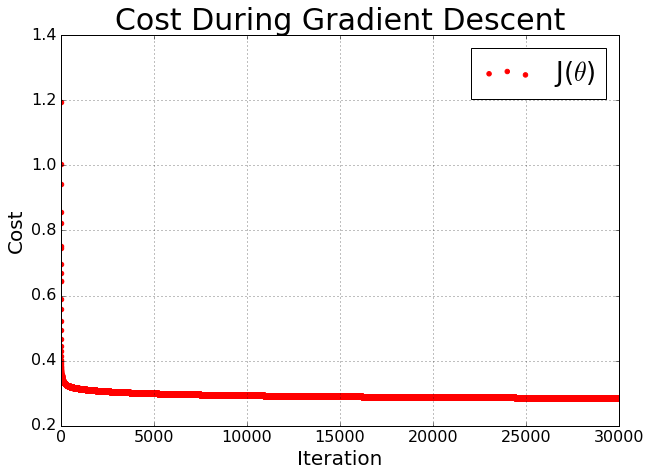

In [17]:
iterations = 30000
# I've set the learning rate very high here, to make it overfit more aggressively.
alpha = 10.0
l = 0.0

# start_cost = cost()

overfit_theta = numpy.zeros(x.shape[0])
overfit_cost_history = []

for i in xrange(iterations):
    # Update the theta parameters:
    grad = gradient(overfit_theta,x,y,l)
    overfit_theta -= alpha*grad
    overfit_cost_history.append(cost(overfit_theta,x,y,l))

overfit_cost_history = numpy.asarray(overfit_cost_history).flatten()

    
def plotCost(x,y):
    
    #Define the plot
    fig, ax = plt.subplots(figsize=(10,7))
    
    #Plot the data
    # Notice that I have to use a raw string (with the r in front) to render the theta correctly
    plt.scatter(x,y,marker="o",color='r',label=r"J($\theta$)")
    

    # Plots require a title and axis labels:
    plt.title("Cost During Gradient Descent", fontsize=30)
    plt.xlabel("Iteration", fontsize=20)
    plt.ylabel("Cost", fontsize=20)

    # Make the ticks bigger to be more visible:
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    
    # Set the plot limits
    ax.set_xlim(0,iterations)

    # Always, plt.grid(True)
    plt.grid(True)
    plt.legend(fontsize=26)

it = range(iterations)
plotCost(it,overfit_cost_history)

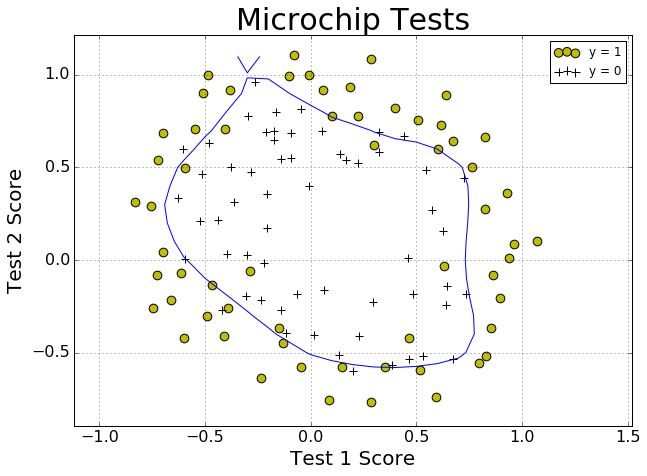

In [18]:
def predict_overfit(x1,x2):
    return h(overfit_theta,mapFeatures(x1,x2))

# Set up the plots
fig, ax = plt.subplots(figsize=(10, 7))

# Go through the data and separate all of the types of answers:
unique_vals = set(y)

# Since I know there are two values, I can define the markers by hand:
markers = ["o","+"]
colors = ['y','black']
labels =['y = 1', 'y = 0']

# Here's the cool part: numpy can distribute the comparison operator to the whole array:
i = 0
for val in unique_vals:
    mask = (y == val )
    

    # Make a scatter plot
    ax.scatter(
        x1[mask], x2[mask], c=colors[i], marker=markers[i],label=labels[i],s=75)

    i += 1
    
# The way to make a decision boundary plot work well is to draw it as a contour plot.
# Create a list of exam values to sample over
exam0_vals = numpy.arange(-1,1.5,0.1)
exam1_vals = numpy.arange(-0.8,1.2,0.1)
j_vals = numpy.zeros((len(exam1_vals),len(exam0_vals)))

for i in xrange(len(exam0_vals)):
    for j in xrange(len(exam1_vals)):
        j_vals[j][i] = predict_overfit(exam0_vals[i],exam1_vals[j])

# print j_vals
        
# Make the contour plot of the cost function:
contours = plt.contour(exam0_vals,exam1_vals,j_vals,
                       levels=[0.5],
                       colors=['b'],
                       label="Cost Function")
# plt.clabel(contours, inline=1, fmt='%1.1f',fontsize=10)
        
# The method used above is slower, but also generalized for complicated contours
        
# Plots require a title and axis labels:
plt.title("Microchip Tests", fontsize=30)
plt.xlabel("Test 1 Score", fontsize=20)
plt.ylabel("Test 2 Score", fontsize=20)

# Make the ticks bigger to be more visible:
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)

# Let's set the axis ranges a little more realistically:
# ax.set_xlim([30, 100])
# ax.set_ylim([30, 100])

# Need a legend, of course:
plt.legend()

plt.grid(True)

Lastly, do it with too much regularization.  Honestly, doing gradient descent here is overkill.  Don't bother.  Just run the minimization routine out of the box.

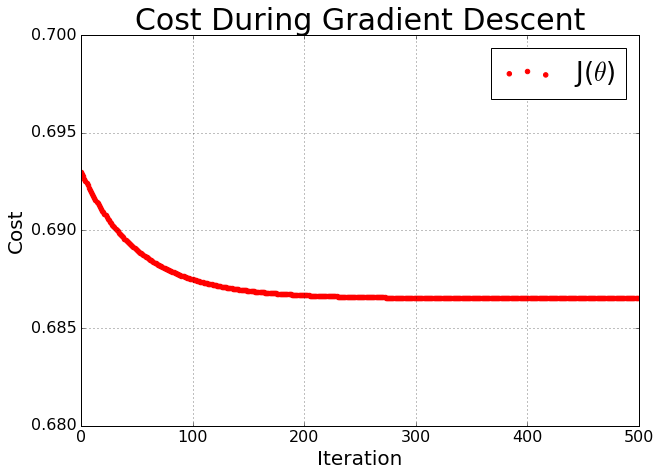

In [19]:
iterations = 500
alpha = 0.01
l = 100.0

# start_cost = cost()

underfit_theta = numpy.zeros(x.shape[0])
underfit_cost_history = []

for i in xrange(iterations):
    # Update the theta parameters:
    grad = gradient(underfit_theta,x,y,l)
    underfit_theta -= alpha*grad
    underfit_cost_history.append(cost(underfit_theta,x,y,l))

underfit_cost_history = numpy.asarray(underfit_cost_history).flatten()

    
def plotCost(x,y):
    
    #Define the plot
    fig, ax = plt.subplots(figsize=(10,7))
    
    #Plot the data
    # Notice that I have to use a raw string (with the r in front) to render the theta correctly
    plt.scatter(x,y,marker="o",color='r',label=r"J($\theta$)")
    

    # Plots require a title and axis labels:
    plt.title("Cost During Gradient Descent", fontsize=30)
    plt.xlabel("Iteration", fontsize=20)
    plt.ylabel("Cost", fontsize=20)

    # Make the ticks bigger to be more visible:
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    
    # Set the plot limits
    ax.set_xlim(0,iterations)

    # Always, plt.grid(True)
    plt.grid(True)
    plt.legend(fontsize=26)

it = range(iterations)
plotCost(it,underfit_cost_history)

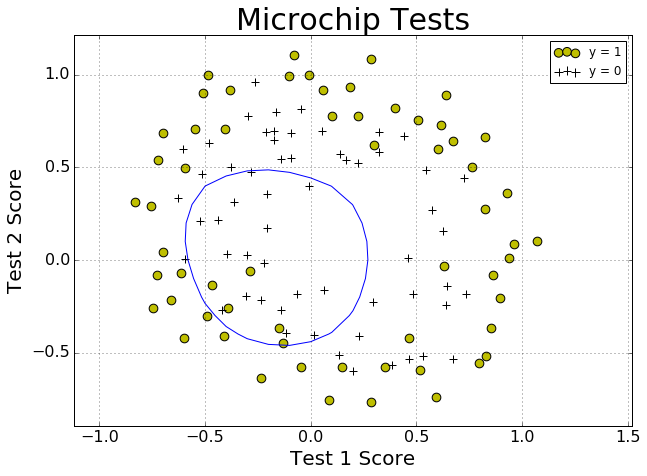

In [21]:
def predict_underfit(x1,x2):
    return h(underfit_theta,mapFeatures(x1,x2))

# Set up the plots
fig, ax = plt.subplots(figsize=(10, 7))

# Go through the data and separate all of the types of answers:
unique_vals = set(y)

# Since I know there are two values, I can define the markers by hand:
markers = ["o","+"]
colors = ['y','black']
labels =['y = 1', 'y = 0']

# Here's the cool part: numpy can distribute the comparison operator to the whole array:
i = 0
for val in unique_vals:
    mask = (y == val )
    

    # Make a scatter plot
    ax.scatter(
        x1[mask], x2[mask], c=colors[i], marker=markers[i],label=labels[i],s=75)

    i += 1
    
# The way to make a decision boundary plot work well is to draw it as a contour plot.
# Create a list of exam values to sample over
exam0_vals = numpy.arange(-1,1.5,0.1)
exam1_vals = numpy.arange(-0.8,1.2,0.1)
j_vals = numpy.zeros((len(exam1_vals),len(exam0_vals)))

for i in xrange(len(exam0_vals)):
    for j in xrange(len(exam1_vals)):
        j_vals[j][i] = predict_underfit(exam0_vals[i],exam1_vals[j])

# print j_vals
        
# Make the contour plot of the cost function:
contours = plt.contour(exam0_vals,exam1_vals,j_vals,
                       levels=[0.5],
                       colors=['b'],
                       label="Cost Function")
# plt.clabel(contours, inline=1, fmt='%1.1f',fontsize=10)
        
# The method used above is slower, but also generalized for complicated contours
        
# Plots require a title and axis labels:
plt.title("Microchip Tests", fontsize=30)
plt.xlabel("Test 1 Score", fontsize=20)
plt.ylabel("Test 2 Score", fontsize=20)

# Make the ticks bigger to be more visible:
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)

# Let's set the axis ranges a little more realistically:
# ax.set_xlim([30, 100])
# ax.set_ylim([30, 100])

# Need a legend, of course:
plt.legend()

plt.grid(True)
